# <center> Logistic Regression

### Importing libraries

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bank = pd.read_excel("Untitled spreadsheet.xlsx")

In [4]:
bank.shape

(45211, 17)

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139.0,1.0,-1.0,0.0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217.0,1.0,-1.0,0.0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,may,380.0,1.0,-1.0,0.0,unknown,no
8,58.0,retired,married,primary,no,121.0,yes,no,unknown,5.0,may,50.0,1.0,-1.0,0.0,unknown,no
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55.0,1.0,-1.0,0.0,unknown,no


## Prediction of y has to be done:
- y says:  Whether the client has subscribed a term deposit or not 

## EDA

#### We see that there are categorical columns, including our target value:


In [11]:
bank.shape

(45211, 17)

<AxesSubplot:>

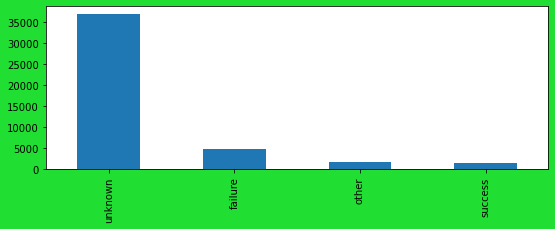

In [25]:
# poutcome is a categorical data
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["poutcome"].value_counts().plot(kind= 'bar')

<AxesSubplot:>

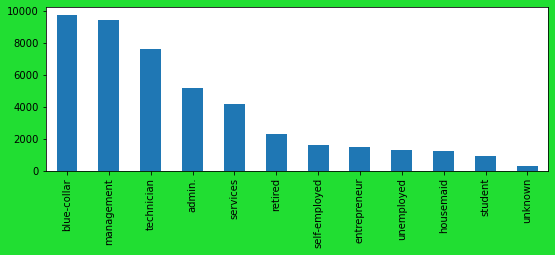

In [24]:
# job is a categorical data
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["job"].value_counts().plot(kind= 'bar')

<AxesSubplot:>

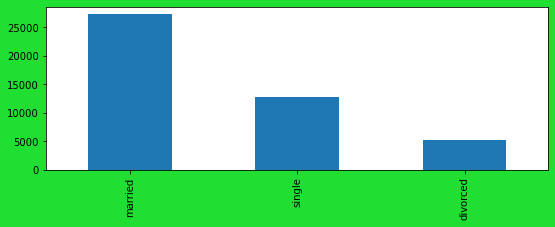

In [26]:
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["marital"].value_counts().plot(kind= 'bar')

<AxesSubplot:>

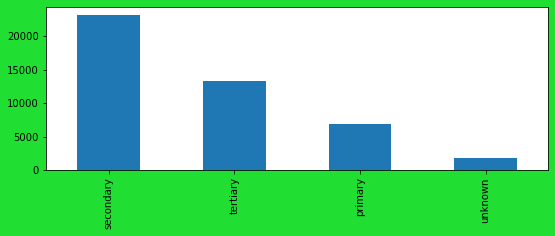

In [27]:
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["education"].value_counts().plot(kind= 'bar')

<AxesSubplot:>

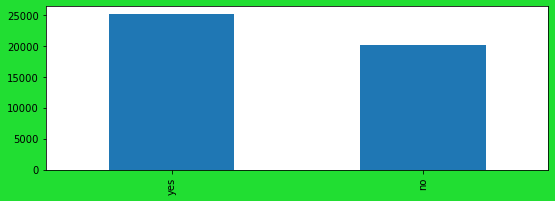

In [28]:
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["housing"].value_counts().plot(kind= 'bar')

<AxesSubplot:>

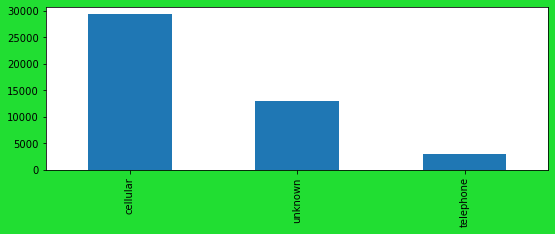

In [30]:
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["contact"].value_counts().plot(kind= 'bar')

<AxesSubplot:>

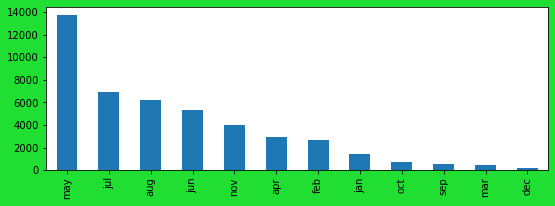

In [29]:
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["month"].value_counts().plot(kind= 'bar')

In [31]:
# checking the null values
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

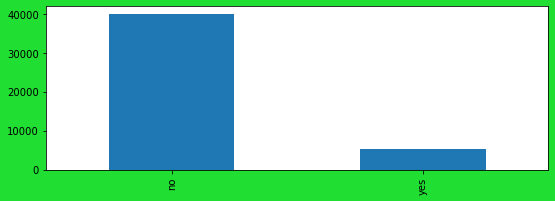

In [32]:
plt.figure(figsize=(9,3),facecolor='#21DE32')
bank["y"].value_counts().plot(kind= 'bar')

### Using get_dummies method to convert the categorical values to numeric values

In [35]:
# since the features are categorical, one-hot encoding is not a viable option, so we go
# note that we do this method to only the features, not the target variable
new_data = pd.get_dummies(bank , columns = ['job', 'marital', 'education','default','housing',
       'loan', 'contact','month', 'poutcome'])

In [36]:
new_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [37]:
new_data.head(3)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


### Also we need to convert the target column to numeric:

In [38]:
new_data['y']= new_data['y'].apply(lambda x:1 if x=='yes' else 0)

In [39]:
new_data.head(3)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#### Seperating the dataset as X(feature) and Y(target)

- Here **iloc[:]** method is not possible, since the features and target variabes are shuffled

In [40]:
X = new_data.loc[:,['age', 'balance','day','duration','campaign','pdays','previous','job_admin.','job_blue-collar','job_entrepreneur','job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'] ]

In [41]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [42]:
Y = new_data.loc[: , 'y']

In [43]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [44]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

## Preparing the model

In [46]:
# Logistic Regression and fit the model
import warnings
warnings.filterwarnings('ignore')

# creating an instance of LogisticRegression class
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [47]:
# to predict the model by input as X
y_hat = classifier.predict(X)
y_hat_df = pd.DataFrame({'actual': Y, 'predicted-value': classifier.predict(X)})

In [27]:
y_hat_df.sample(10)

,actual,predicted-value
23707,0,0
39131,0,0
25074,0,0
28781,0,0
23716,0,0
31672,1,0
3937,0,0
41494,1,1
4137,0,0
24999,0,0


In [48]:
# confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y, y_hat)
print(confusion_matrix)

[[39172   750]
 [ 4149  1140]]


In [50]:
# accuracy classification score
ac(Y, y_hat)

0.8916414146999624

In [51]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y , y_hat))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



## <center> ===================== Model Accuracy: 89% ==========================